<a href="https://colab.research.google.com/github/ayushfande2003/CycleGAN-Edges2Shoes/blob/main/CycleGAN_Edges2Shoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Name:** Ayush Vitthal Fande

**Roll No.:** FY\_AIDS\_45

**Div:** A

**Branch:** AI\&DS

#**Project Title: Image-to-Image Translation with CycleGAN: A Deep Dive into Edges2Shoes**

This project focuses on converting edge sketches of shoes into photorealistic images using CycleGAN, a deep learning model designed for unpaired image-to-image translation. Unlike paired models, CycleGAN doesn’t require aligned image pairs. It employs two generators (G\_AB, G\_BA) and two discriminators (D\_A, D\_B). G\_AB translates edges to shoes and G\_BA reverses it, while D\_A and D\_B distinguish real from generated images. The core concept is cycle consistency, where translating an image forward and backward should return something similar to the original, enforced through cycle consistency loss. Adversarial training is used where generators aim to fool discriminators, leading to more realistic outputs.

The Edges2Shoes dataset from Hugging Face contains paired sketches and shoe images, which help demonstrate CycleGAN’s capabilities. The project uses the Hugging Face Datasets library and PyTorch. A custom dataset class handles preprocessing like resizing and tensor conversion. DataLoader feeds the data for training. Visualization shows input sketches alongside generated shoe images for performance evaluation. Metrics like FID can be used for quantitative analysis.

##**Implementation Overview:**
Libraries installed: datasets, torchvision, matplotlib.
Modules imported include load_dataset, Dataset, DataLoader, transforms, PIL.Image, and torch.
The dataset is loaded using load_dataset("huggan/edges2shoes", split="train").
A custom Dataset class handles image loading and transformation. Transformations resize images to 256x512 and convert to tensors. A DataLoader is created with batch size 1 and shuffle enabled. A visualization function displays real and generated image pairs using matplotlib.

**Conclusion:** This project demonstrates CycleGAN's potential in unpaired image-to-image translation, effectively generating shoe images from sketches. It sets the stage for applying CycleGAN to other creative tasks and refining output quality through advanced training techniques.

Repo card metadata block was not found. Setting CardData to empty.


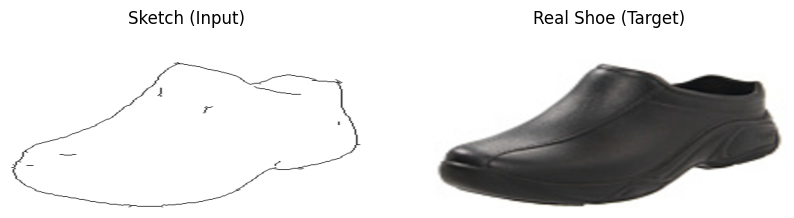

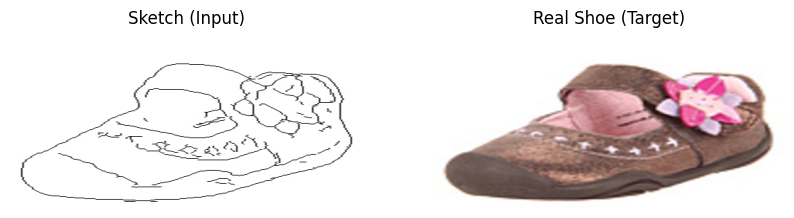

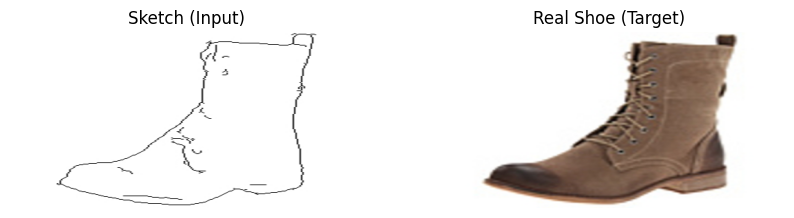

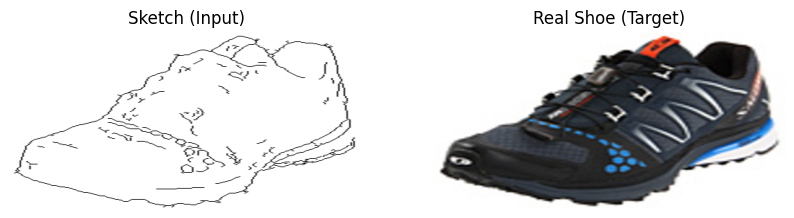

In [ ]:
# ✅ STEP 1: Install necessary libraries
!pip install datasets torchvision matplotlib

# ✅ STEP 2: Import required libraries
import io # Import the io module for working with byte streams

from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from PIL import Image

# ✅ STEP 3: Load dataset from Hugging Face
dataset = load_dataset("huggan/edges2shoes", split="train")

# ✅ STEP 4: Create custom PyTorch Dataset class
class HuggingFaceEdges2Shoes(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset          # the HuggingFace dataset
        self.transform = transform            # transformation to apply

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        # Load images in PIL format using the correct keys 'image.a' and 'image.b'
        # Access the image data within the dictionaries using the 'bytes' key
        input_image = Image.open(io.BytesIO(self.hf_dataset[idx]['imageA']['bytes']))  # sketch (edges)
        target_image = Image.open(io.BytesIO(self.hf_dataset[idx]['imageB']['bytes']))  # photo (shoes)

        # Concatenate the images horizontally if necessary
        #image = Image.new('RGB', (input_image.width + target_image.width, input_image.height))
        #image.paste(input_image, (0, 0))
        #image.paste(target_image, (input_image.width, 0))

        if self.transform:
            input_image = self.transform(input_image)
            target_image = self.transform(target_image)

        return input_image, target_image
# ✅ STEP 5: Define transformation
transform = transforms.Compose([
    transforms.Resize((256, 512)),  # Resize both width and height
    transforms.ToTensor(),          # Convert to tensor with pixel values (0-1)
])

# ✅ STEP 6: Create dataset and dataloader
custom_dataset = HuggingFaceEdges2Shoes(dataset, transform=transform)
data_loader = DataLoader(custom_dataset, batch_size=1, shuffle=True)

# ✅ STEP 7: Visualize one sample
def show_sketch_and_real(num_images=5):  # Function to display images, defaults to 5
    # Get 'num_images' batches (samples)
    count = 0
    for sketch, real in data_loader:
        if count >= num_images:
            break
        # Convert tensors to numpy for plotting
        sketch_np = sketch[0].permute(1, 2, 0).numpy()
        real_np = real[0].permute(1, 2, 0).numpy()

        # Plot side-by-side
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(sketch_np)
        plt.title("Sketch (Input)")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(real_np)
        plt.title("Real Shoe (Target)")
        plt.axis("off")

        plt.show()
        count += 1

# ✅ Call the function to display 4 images
show_sketch_and_real(num_images=4)